# Início

In [2]:
# Deixarei aqui o link para o Google Colab que utilizei para fazer esta análise.
# https://colab.research.google.com/drive/1edxQkhDx_Tc4y4u5_MHfcImREte6pNll?usp=sharing

# Neste documento, tentarei responder as seguintes perguntas: 

# Qual é o herói mais forte, o mais fraco, e o herói com as estatísticas mais próximas da média?

# Quais as habilidades mais comuns e as menos comuns?

# Qual é a distribuição de gênero dos personagens?

# Qual é o top 10 personagens femininos? 

# Quais são os criadores/editoras mais comum de personagem?

# Utilizar o wordcloud para verificar a frequência das palavras na coluna "history_text" por "creator".


In [3]:
import numpy as np 
import pandas as pd 

dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Desafio Santander/superheroes_nlp_dataset.csv')
pd.options.display.max_columns = None # Esse código faz com que todas as colunas sejam impressas.

dados.sample(10)

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,superpowers,alter_egos,aliases,place_of_birth,first_appearance,creator,alignment,occupation,base,teams,relatives,gender,type_race,height,weight,eye_color,hair_color,skin_color,img,has_electrokinesis,has_energy_constructs,has_mind_control_resistance,has_matter_manipulation,has_telepathy_resistance,has_mind_control,has_enhanced_hearing,has_dimensional_travel,has_element_control,has_size_changing,has_fire_resistance,has_fire_control,has_dexterity,has_reality_warping,has_illusions,has_energy_beams,has_peak_human_condition,has_shapeshifting,has_heat_resistance,has_jump,has_self-sustenance,has_energy_absorption,has_cold_resistance,has_magic,has_telekinesis,has_toxin_and_disease_resistance,has_telepathy,has_regeneration,has_immortality,has_teleportation,has_force_fields,has_energy_manipulation,has_endurance,has_longevity,has_weapon-based_powers,has_energy_blasts,has_enhanced_senses,has_invulnerability,has_stealth,has_marksmanship,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
199,Blackwulf,Lucian,Lucian,5,Lucian was the fourth child born to Tantalus...,"Lucian inherited his father's Black Legacy, a ...",75,30,10,30,70,25,"['Death Touch', 'Durability', 'Energy Blasts',...",[],"['Pelops, Black Wolf']",Armechadon,"Thunderstrike #6 (March, 1994)",Marvel Comics,NaN,Freedom Fighter,NaN,[],Tantalus (father); Nirvana (mother); Pelops (b...,Male,Alien,6'2 • 188 cm,195 lb • 88 kg,Red,White,NaN,/pictures2/portraits/10/050/1508.jpg?v=1314440763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
664,Jacob Frye,Jacob Frye,NaN,7,Sir Jacob Frye is the main male protagonist of...,Eagle Vision,90,10,40,35,65,100,"['Agility', 'Danger Sense', 'Durability', 'Ene...",[],['Assassin'],London,Assassin's Creed Syndicate,Ubisoft,Good,Assassin,London,[],Evie Frye (Sister),Male,Human,5'9 • 175 cm,160 lb • 72 kg,Blue,Brown,NaN,/pictures2/portraits/10/050/12308.jpg?v=157814...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
588,Hela,NaN,NaN,16,NaN,Hela possesses the conventional superhuman a...,80,100,45,100,100,45,"['Accelerated Healing', 'Agility', 'Astral Pro...",[],['Goddess of Death'],NaN,Journey into Mystery #102,Marvel Comics,Bad,"Asgardian Goddess of Death, former Ruler of He...",NaN,"['Gods of Esgard', 'Hell Lords']","Loki (father), Thor (Uncle)",Female,Asgardian,7'0 • 213 cm,500 lb • 225 kg,Green,Black,NaN,/pictures2/portraits/10/050/10835.jpg?v=149193...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
505,Gary Bell,Gary Bell,Gary Bell,6,"Gary Bell is in his twenties, sensitive to man...",NaN,80,5,10,10,55,10,"['Enhanced Senses', 'Intelligence']",[],[''],NaN,NaN,SyFy,Good,NaN,NaN,['Alphas'],NaN,Male,Alpha,-,-,NaN,NaN,NaN,/pictures2/portraits/10/050/1526.jpg?v=1314863498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
659,Jack Frost,Jackson Overland Frost,NaN,9,Before Jack Frost became an immortal being who...,NaN,85,35,40,50,100,70,"['Agility', 'Cryokinesis', 'Element Control', ...",[],"['Father Frost', 'Old Man Winter', 'Jokul Fros...",Burgess,NaN,Dreamworks,Good,Guardian of Fun King of Childhood,NaN,[],Flee,Male,Human,-,-,Blue,Brown / White,NaN,/pictures2/portraits/11/050/10921.jpg?v=155517...,0.0,0.

In [4]:
# Irei imprimir as informações do dataframe para verificar o tipo de dados de cada colune e também descobrir quantas linhas temos nessa dataframe.
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 81 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   name                              1448 non-null   object 
 1   real_name                         1301 non-null   object 
 2   full_name                         956 non-null    object 
 3   overall_score                     1450 non-null   object 
 4   history_text                      1360 non-null   object 
 5   powers_text                       1086 non-null   object 
 6   intelligence_score                1450 non-null   int64  
 7   strength_score                    1450 non-null   int64  
 8   speed_score                       1450 non-null   int64  
 9   durability_score                  1450 non-null   int64  
 10  power_score                       1450 non-null   int64  
 11  combat_score                      1450 non-null   int64  
 12  superp

# Breve análise de VERACIDADE dos dados.

In [5]:
# A primeira coisa que me chama a atenção é que existem 1448 nomes, mas existem 1450 linhas. 
# Então irei somar os valores nulos em todas as colunas.
dados.isnull().sum().head(20)


name                    2
real_name             149
full_name             494
overall_score           0
history_text           90
powers_text           364
intelligence_score      0
strength_score          0
speed_score             0
durability_score        0
power_score             0
combat_score            0
superpowers             0
alter_egos              0
aliases                 0
place_of_birth        662
first_appearance      203
creator               139
alignment              82
occupation            436
dtype: int64

In [6]:
# Existem dois nomes com valores nulos na dataframe.
# Logo, primeiramente irei filtrar para saber quais são, e se precisam ser removidos, pois mesmo que não existam 2 nomes, ainda existe um overall sobre eles, pois existem 1450 overall.
name_null = dados[dados.name.isnull()]
name_null.head()

# Aparentemente um é o Chameleon e outro é alguém que possui o poder do Doctor Doom.
# Não se sabe muito sobre as suas capacidades, logo não irão interferir nas análises.


,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,superpowers,alter_egos,aliases,place_of_birth,first_appearance,creator,alignment,occupation,base,teams,relatives,gender,type_race,height,weight,eye_color,hair_color,skin_color,img,has_electrokinesis,has_energy_constructs,has_mind_control_resistance,has_matter_manipulation,has_telepathy_resistance,has_mind_control,has_enhanced_hearing,has_dimensional_travel,has_element_control,has_size_changing,has_fire_resistance,has_fire_control,has_dexterity,has_reality_warping,has_illusions,has_energy_beams,has_peak_human_condition,has_shapeshifting,has_heat_resistance,has_jump,has_self-sustenance,has_energy_absorption,has_cold_resistance,has_magic,has_telekinesis,has_toxin_and_disease_resistance,has_telepathy,has_regeneration,has_immortality,has_teleportation,has_force_fields,has_energy_manipulation,has_endurance,has_longevity,has_weapon-based_powers,has_energy_blasts,has_enhanced_senses,has_invulnerability,has_stealth,has_marksmanship,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
283,NaN,NaN,NaN,-,Dmitri Smerdyakov was the illegitimate son of ...,The Chameleon can instantly change his appeara...,0,0,0,0,0,0,[],[],[''],NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/pictures2/portraits/10/050/660.jpg?v=,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,NaN,NaN,NaN,-,NaN,None known except that he may possess the abil...,0,0,0,0,0,0,[],[],[''],NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/pictures2/portraits/10/050/1018.jpg?v=,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Resolvi fazer uma rápida busca por um super herói que conheço bem, para poder validar as informações desse dataframe.
# Pesquisei então pelo nome real do Batman, trazendo assim todas as versões do super herói cadastrado aqui. A consulta trouxe 12 resultados, e um em particular me chamou a atenção.
# Nas informações que a dataframe trouxe sobre o 'Batman (1966)' (Batman da série dos anos 60, interpretado por Adam West), traz a informação de altura dele sendo 32'9 ou 998 cm. 
# Com um rápido google, podemos encontrar a altura de Adam West, que era de 6'2” ou 1.88m, algo bem distante de quase 10 metros, como mostra na dataframe.
# Alem de que 'Batman (Arkham)', provavelmente referente ao Batman da série de jogos Arkham, conta com as caracteristicas electrokinesis, enhanced_hearing, fire_control entre outras. Que acredito que sejam apetrechos tecnologicos
# que o personagem usa durante o jogo, e não uma capacidade do super herói em si. Eletrokinesis é a capacidade de manipulação de eletrecidade, por exemplo. Não a capacidade de desferir golpes eletricos com apetrechos.
# logo, concluo que existem alguns problemas de VERACIDADE nessa dataframe, mas iremos continuar a análise mesmo assim.
dados[dados['real_name']== 'Bruce Wayne']

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,superpowers,alter_egos,aliases,place_of_birth,first_appearance,creator,alignment,occupation,base,teams,relatives,gender,type_race,height,weight,eye_color,hair_color,skin_color,img,has_electrokinesis,has_energy_constructs,has_mind_control_resistance,has_matter_manipulation,has_telepathy_resistance,has_mind_control,has_enhanced_hearing,has_dimensional_travel,has_element_control,has_size_changing,has_fire_resistance,has_fire_control,has_dexterity,has_reality_warping,has_illusions,has_energy_beams,has_peak_human_condition,has_shapeshifting,has_heat_resistance,has_jump,has_self-sustenance,has_energy_absorption,has_cold_resistance,has_magic,has_telekinesis,has_toxin_and_disease_resistance,has_telepathy,has_regeneration,has_immortality,has_teleportation,has_force_fields,has_energy_manipulation,has_endurance,has_longevity,has_weapon-based_powers,has_energy_blasts,has_enhanced_senses,has_invulnerability,has_stealth,has_marksmanship,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,NaN,100,20,30,50,35,100,"['Durability', 'Reflexes', 'Super Strength']","['Batgod', 'Batman', 'Batman (1966)', 'Batman ...","['Subject 514A', 'Bruce Wayne', 'Bruce 2']",NaN,NaN,DC Comics,NaN,NaN,NaN,[],Bruce Wayne (genetic template),NaN,NaN,-,-,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
130,Batman (1966),Bruce Wayne,Bruce Wayne,6,"ruce Wayne is Batman, a brilliant crimefighter...",Peak Human Condition,80,30,35,40,90,70,"['Agility', 'Audio Control', 'Cold Resistance'...","['514A (Gotham)', 'Batgod', 'Batman', 'Batman ...",[''],Gotham City,Batman 1966,DC Comics,NaN,Vigilante,Bat Cave,[],"Martha Wayne, Thomas Wayne,",Male,Human,32'9 • 998 cm,198 lb • 89 kg,Black,Brown / Black,NaN,/pictures2/portraits/11/050/13085.jpg?v=155310...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
131,Batman (Arkham),Bruce Wayne,Bruce Wayne,12,When his parents were gunned down in front of ...,He has many gadgets like Sonic batarans flame ...,100,20,55,100,95,100,"['Agility', 'Audio Control', 'Cryokinesis', 'E...","['514A (Gotham)', 'Batgod', 'Batman', 'Batman ...",['The dark knight'],Gotham City,Batman Arkham Asylum,DC Comics,Good,Crime fighter,Batcave,[],Alfred (buttler),Male,Human,5'10 • 178 cm,198 lb • 89 kg,Black,Black,NaN,/pictures2/portraits/11/050/16093.jpg?v=155343...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
132,Batman (Burtonverse),Bruce Wayne,Bruce Wayne,7,Bruce Wayne is a billionaire playboy from Goth...,,90,15,25,40,40,90,"['Agility', 'Durability', 'Endurance', 'Fire R...","['514A (Gotham)', 'Batgod', 'Batman', 'Batman ...","['Batman, The Bat']",NaN,Batman (1989),DC Comics,Good,"Vigilante, Businessman",Gotham City,[],"Thomas Wayne (father, deceased), Martha Wayne ...",Male,Human,5'9 • 175 cm,161 lb • 72 kg,Brown,Black,NaN,/pictures2/portraits/11/050/16501.jpg?v=155421...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
134,Batman (DCAU),Bruce Wayne,NaN,9,Bruce Wayne was orphaned as a child when he wi...,NaN,100,10,30,30,35,100,"['Acrobatics', 'Indomitable Will', 'Intelligen...","['514A (Gotham)', 'Batgod', 'Bat

# Herói - O médio, o forte e o fraco.

In [8]:
# Agora irei trazer a descrição da tabela para tentar retirar algumas informações estatísticas sobre as classificações de habilidade dos heróis.
dados.describe()
# Aqui temos a média de inteligência, força, velocidade, durabilidade, poder e combate.

# A média de Inteligência é: 79   # A média de Força é: 39     # A média de Velocidade é: 46 

# A média de Durabilidade é: 56   # A média de Poder é: 66     # A média de Combate é: 68 

,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,has_electrokinesis,has_energy_constructs,has_mind_control_resistance,has_matter_manipulation,has_telepathy_resistance,has_mind_control,has_enhanced_hearing,has_dimensional_travel,has_element_control,has_size_changing,has_fire_resistance,has_fire_control,has_dexterity,has_reality_warping,has_illusions,has_energy_beams,has_peak_human_condition,has_shapeshifting,has_heat_resistance,has_jump,has_self-sustenance,has_energy_absorption,has_cold_resistance,has_magic,has_telekinesis,has_toxin_and_disease_resistance,has_telepathy,has_regeneration,has_immortality,has_teleportation,has_force_fields,has_energy_manipulation,has_endurance,has_longevity,has_weapon-based_powers,has_energy_blasts,has_enhanced_senses,has_invulnerability,has_stealth,has_marksmanship,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000
mean,79.103448,39.458621,46.389655,56.193103,66.913793,68.175862,0.090383,0.076645,0.075922,0.050615,0.083876,0.082430,0.133044,0.080260,0.109906,0.089660,0.120029,0.095445,0.148952,0.046999,0.090383,0.093999,0.169197,0.112798,0.155459,0.151121,0.122921,0.143167,0.152567,0.108460,0.102675,0.156905,0.135936,0.151844,0.146059,0.136659,0.135213,0.141721,0.229935,0.224873,0.262473,0.206074,0.241504,0.253796,0.320318,0.349964,0.266811,0.308026,0.409978,0.433116,0.428778,0.386840,0.511931,0.532899,0.562545,0.528561
std,25.048393,34.385566,29.205902,31.647711,33.225127,29.540420,0.286834,0.266124,0.264969,0.219289,0.277301,0.275117,0.339745,0.271794,0.312886,0.285798,0.325113,0.293934,0.356170,0.211714,0.286834,0.291932,0.375062,0.316460,0.362473,0.358296,0.328465,0.350370,0.359700,0.311073,0.303644,0.363843,0.342845,0.358999,0.353293,0.343612,0.342075,0.348890,0.420943,0.417650,0.440137,0.404630,0.428150,0.435340,0.466768,0.477131,0.442453,0.461844,0.492007,0.495686,0.495080,0.487203,0.500038,0.499097,0.496252,0.499364
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,10.000000,25.000000,30.000000,40.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,85.000000,30.000000,40.000000,55.000000,72.500000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [9]:
# Vamos ver então quais seriam os super heróis que estão na média em todos os quesitos.
# irei aplicar um filtro com uma margem de 5 pontos para cima e para baixo da média de todos os valores e ver oque encontramos.

herois_media = dados[dados['intelligence_score'].between(74, 84) & dados['strength_score'].between(34, 44) & dados['speed_score'].between(41, 51) & dados['durability_score'].between(51, 61) & dados['power_score'].between(61, 71) & dados['combat_score'].between(63, 73)]
herois_media.head()



,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,superpowers,alter_egos,aliases,place_of_birth,first_appearance,creator,alignment,occupation,base,teams,relatives,gender,type_race,height,weight,eye_color,hair_color,skin_color,img,has_electrokinesis,has_energy_constructs,has_mind_control_resistance,has_matter_manipulation,has_telepathy_resistance,has_mind_control,has_enhanced_hearing,has_dimensional_travel,has_element_control,has_size_changing,has_fire_resistance,has_fire_control,has_dexterity,has_reality_warping,has_illusions,has_energy_beams,has_peak_human_condition,has_shapeshifting,has_heat_resistance,has_jump,has_self-sustenance,has_energy_absorption,has_cold_resistance,has_magic,has_telekinesis,has_toxin_and_disease_resistance,has_telepathy,has_regeneration,has_immortality,has_teleportation,has_force_fields,has_energy_manipulation,has_endurance,has_longevity,has_weapon-based_powers,has_energy_blasts,has_enhanced_senses,has_invulnerability,has_stealth,has_marksmanship,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
627,Iceman (FOX),Bobby Drake,NaN,6,"Bobby lived with his mother, father and younge...",Iceman possesses the ability to manipulate and...,80,35,50,60,70,65,"['Cold Resistance', 'Cryokinesis', 'Durability...","['Death Seed Iceman', 'Iceman']",['Bobby'],NaN,X men,Marvel Comics,Good,NaN,NaN,[],Madeline Drake - Mother\n﻿William Drake - Fath...,Male,Mutant,5'4 • 163 cm,198 lb • 89 kg,Blue,Blue,Blue,/pictures2/portraits/11/050/13990.jpg?v=155387...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [10]:
# Já que encontramos o super herói mais mediano, nada mais justo do que procurar o mais e menos poderoso!
dados.overall_score.sort_values(ascending=False)
# Bom, temos super heróis com valores infinitos, e super heróis com falores nulos. Logo, irei desconsiderá-los.
# Acredito que os personagens classificados com poder infinito mechem mais com o subjetivo do que com o racional. Não creio que possamos mensurar com dados, habilidades que são definidas por roteiro ou conveniência do escritor.
# # Irei analisar somente os heróis que contém número.

153     ∞
450     ∞
1337    ∞
845     ∞
1202    ∞
       ..
1018    -
263     -
1330    -
1326    -
603     -
Name: overall_score, Length: 1450, dtype: object

In [11]:
dados_overall_tratado = dados.loc[dados.overall_score.str.isnumeric()].overall_score.astype('int32').sort_values(ascending=False)
dados_overall_tratado
# Criei uma tabela auxiliar para que a transformação não interfira com as análises futuras.
# Encontramos então o número 538, que tem o Overall de 237, e um empate no último lugar, dos números 994 e 129 com apenas um ponto.

538    237
393    229
527    226
110    222
421    211
      ... 
259      2
758      2
292      2
994      1
129      1
Name: overall_score, Length: 1325, dtype: int32

In [12]:
dados_mais_menos_forte = dados[(dados['overall_score'] == '237') | (dados['overall_score'] =='1')]
dados_mais_menos_forte.head()

# Temos então como personagem mais poderoso dessa lista, com valores não infinitos, o personagem Great Evil Beast. 


,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,superpowers,alter_egos,aliases,place_of_birth,first_appearance,creator,alignment,occupation,base,teams,relatives,gender,type_race,height,weight,eye_color,hair_color,skin_color,img,has_electrokinesis,has_energy_constructs,has_mind_control_resistance,has_matter_manipulation,has_telepathy_resistance,has_mind_control,has_enhanced_hearing,has_dimensional_travel,has_element_control,has_size_changing,has_fire_resistance,has_fire_control,has_dexterity,has_reality_warping,has_illusions,has_energy_beams,has_peak_human_condition,has_shapeshifting,has_heat_resistance,has_jump,has_self-sustenance,has_energy_absorption,has_cold_resistance,has_magic,has_telekinesis,has_toxin_and_disease_resistance,has_telepathy,has_regeneration,has_immortality,has_teleportation,has_force_fields,has_energy_manipulation,has_endurance,has_longevity,has_weapon-based_powers,has_energy_blasts,has_enhanced_senses,has_invulnerability,has_stealth,has_marksmanship,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
129,Bathound,Ace,NaN,1,Ace was the guide dog of a blind native Americ...,NaN,50,10,15,30,30,35,"['Danger Sense', 'Enhanced Hearing', 'Enhanced...",[],['Ace the bathound'],Gotham,Batman #462,DC Comics,Good,NaN,NaN,['Batman Family'],NaN,Male,Animal,3'7 • 109 cm,88 lb • 40 kg,Black,Brown,Black,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538,Great Evil Beast,The Great Darkness,NaN,237,The Great Evil Beast was formed when God utter...,I don't know much about his powers so this is ...,100,100,100,100,100,100,"['Absorption', 'Accelerated Healing', 'Agility...",[],"['The Shadow Creature, the Primordial Darkness...",Beginning of Creation,Swamp Thing American Gothic Storyline,DC Comics,Bad,The Great Darkness of the Multiverse,Unknown,[],NaN,NaN,God / Eternal,-,-,NaN,NaN,NaN,/pictures2/portraits/11/050/11025.jpg?v=158483...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
994,Paul Blart,Paul Blart,NaN,1,Paul Blart is a mall cop. Everyday he protect...,NaN,45,10,20,50,5,5,[],[],['Mall Cop'],NaN,NaN,Sony Pictures,Good,NaN,NaN,[],NaN,Male,Human,5'7 • 170 cm,260 lb • 117 kg,NaN,NaN,NaN,/pictures2/portraits/10/050/10479.jpg?v=144536...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


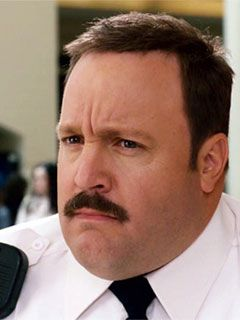

In [13]:
import requests
import IPython.display as Disp
mais_fraco = dados.query(" name =='Paul Blart' ")
mais_fraco_img = "https://www.superherodb.com" + mais_fraco['img'].values[0]
Disp.Image(requests.get(mais_fraco_img).content)

# E como mais fraco, temos Paul Blart, do filme Segurança do Shopping,  que é classificado como tão fraco quanto Ace, O Batcão.
# Tentei imprimir anteriormente as imagens do herói mediano (Iceman), do Batcão e do Great Evil Beast, mas o link para elas estão todos quebrados.

Paul Blart - O Segurança do Shopping 

# Análise de habilidades

In [14]:
# Irei encontrar agora os super poderes mais comuns listado nessa dataframe. 
dados_poderes = dados.columns[dados.columns.str.startswith("has_")]
# superpowers_cols = df.columns[df.columns.str.startswith("has_")]
dados[dados_poderes].sum().sort_values(ascending=False)

# O super poder mais comum é a Agilidade, seguido de: 
# Stamina
# Super força 
# Durabilidade 
# Inteligencia. 

# O super poder menos comum é a Distorção de Realidade, seguido de:
# Manipulação de matéria
# Resistencia a controle de mente
# Construto de energia
# Viagem Dimensional

# Os super poderes mais comuns geralmente são os mais convenientes que um super herói possa ter.
# E os menos comuns são os mais difíceis de se manusear em um roteiro de história, como as duas últimas habilidades menos comuns que são extremamente poderosas.

has_agility                         778.0
has_stamina                         737.0
has_super_strength                  731.0
has_durability                      708.0
has_intelligence                    599.0
has_reflexes                        593.0
has_weapons_master                  567.0
has_super_speed                     535.0
has_marksmanship                    484.0
has_stealth                         443.0
has_accelerated_healing             426.0
has_flight                          369.0
has_weapon-based_powers             363.0
has_invulnerability                 351.0
has_enhanced_senses                 334.0
has_endurance                       318.0
has_longevity                       311.0
has_energy_blasts                   285.0
has_peak_human_condition            234.0
has_toxin_and_disease_resistance    217.0
has_heat_resistance                 215.0
has_cold_resistance                 211.0
has_regeneration                    210.0
has_jump                          

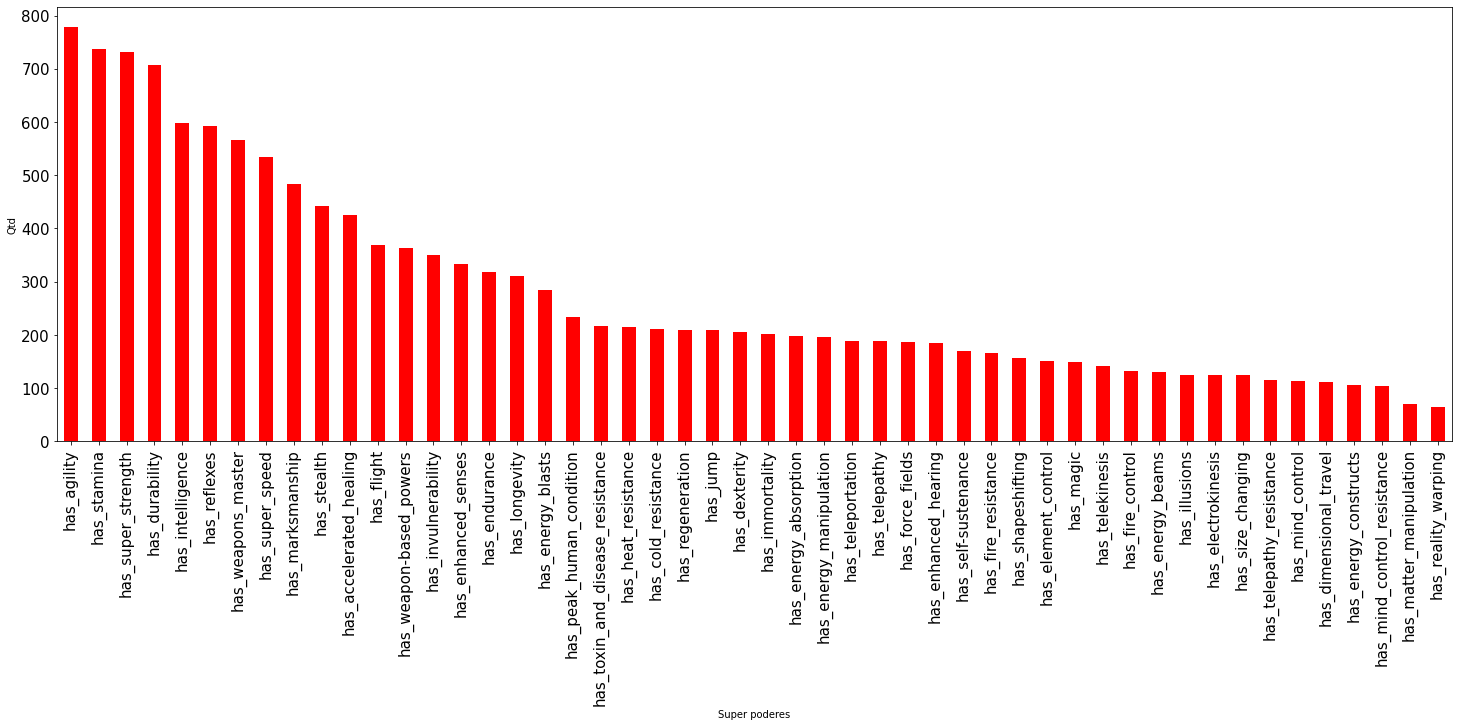

In [15]:
dados[dados_poderes].sum().sort_values(ascending=False).plot(kind='bar', figsize = (25,8), color='red', fontsize= 15, xlabel=('Super poderes'), ylabel=('Qtd'))

# Distribuição de Gênero e Top 10 Personagens femininas.

In [16]:
# Irei aproveitar a sugestão do post e verificar a distribuição de gênero e em seguida encontrar o top 10 personagens femininos, que tenham números no overall.
dados.gender.value_counts()

Male      970
Female    335
Name: gender, dtype: int64

Quantidade de Homens e mulheres


In [17]:
dados.gender.value_counts(normalize=True)

Male      0.743295
Female    0.256705
Name: gender, dtype: float64

Temos então 74,3295% de Homens e 25,6705% de Mulheres

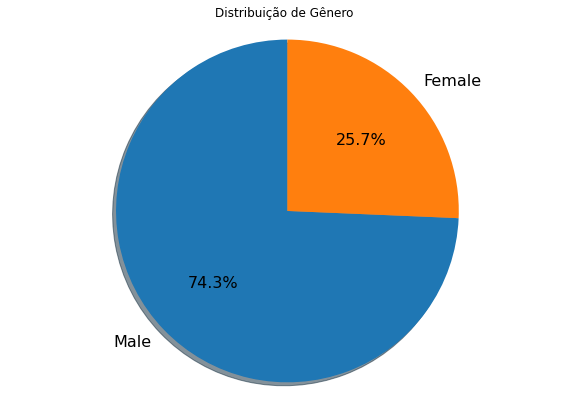

In [18]:
import matplotlib.pyplot as plt

dados_pie = dados.gender.value_counts(normalize=True)

labels = 'Male', 'Female'
fig, ax = plt.subplots()
ax.pie(dados_pie, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 16})
ax.axis('equal') 
fig.set_size_inches(10,7)
plt.title('Distribuição de Gênero ', fontsize=12)

plt.show()

# A quantidade anterior expressada em um gráfico de pizza.

In [19]:
dados_femininos = dados[dados.gender == 'Female'] #criei então outro dataframe somente com a informação Female(feminino) na coluna Gender(genero).
dados_femininos.sample(10)

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,superpowers,alter_egos,aliases,place_of_birth,first_appearance,creator,alignment,occupation,base,teams,relatives,gender,type_race,height,weight,eye_color,hair_color,skin_color,img,has_electrokinesis,has_energy_constructs,has_mind_control_resistance,has_matter_manipulation,has_telepathy_resistance,has_mind_control,has_enhanced_hearing,has_dimensional_travel,has_element_control,has_size_changing,has_fire_resistance,has_fire_control,has_dexterity,has_reality_warping,has_illusions,has_energy_beams,has_peak_human_condition,has_shapeshifting,has_heat_resistance,has_jump,has_self-sustenance,has_energy_absorption,has_cold_resistance,has_magic,has_telekinesis,has_toxin_and_disease_resistance,has_telepathy,has_regeneration,has_immortality,has_teleportation,has_force_fields,has_energy_manipulation,has_endurance,has_longevity,has_weapon-based_powers,has_energy_blasts,has_enhanced_senses,has_invulnerability,has_stealth,has_marksmanship,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
82,Ardina,Ardina,NaN,21,"Ardina was created magically, by stabbing Sil...",Ardina has superhuman abilities derived from...,80,100,100,80,100,25,"['Accelerated Healing', 'Agility', 'Cold Resis...",[],[''],NaN,The Order #4,Marvel Comics,Good,NaN,NaN,"['Defenders', 'Heralds of Galactus']","Norrin Radd (Silver Surfer, clonal source), Cl...",Female,Alien,6'4 • 193 cm,218 lb • 98 kg,White,Orange,Gold,/pictures2/portraits/10/050/10132.jpg?v=149254...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
868,Maya Herrera,Maya Herrera,Maya Herrera,5,Maya Herrera is a evolved human from Santo Dom...,NaN,75,10,10,15,60,15,"['Substance Secretion', 'Toxin and Disease Con...",[],[''],Dominican Republic,NaN,NBC - Heroes,Good,NaN,NaN,[],Alejandro (twin brother),Female,NaN,-,-,NaN,NaN,NaN,/pictures2/portraits/10/050/944.jpg?v=1218334177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
578,Hawkgirl,Kendra Saunders,Kendra Saunders,20,"The current Hawkgirl is Kendra Saunders, a you...","Reincarnation: Additionally, the Nth metal kni...",85,80,90,100,100,90,"['Accelerated Healing', 'Agility', 'Animal Att...",['Hawkgirl (CW)'],"['Chay-Ara; Sheila Carr; Lady Celia Penbrook, ...",NaN,JSA Secret Files #1 (August 1999),DC Comics,Good,"Adventurer, Film School Student, Temp Curator ...","St. Roch, Louisiana, JLA Watchtower; formerly ...","['Superfriends', 'Justice League of America', ...","Michael Saunders (father, deceased); Trina Sa...",Female,NaN,5'9 • 175 cm,135 lb • 61 kg,Green,Red,NaN,/pictures2/portraits/10/050/703.jpg?v=1580006075,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
970,Nyssa Al Ghul (CW),Nyssa Raatko,Nyssa Raatko,6,Nyssa Raatko (Arabic: نيسا رعتكو‎) (born May 1...,"As a highly skilled assassin, Nyssa is in top...",85,15,50,40,50,100,"['Agility', 'Dexterity', 'Durability', 'Endura...",[],['Nyssa al Ghul'],Earth-1,Arrow Season 2: Episode 13,NaN,Good,Assassin,Mobile; formerly Nanda Parbat,[],"Ra's al Ghul (father, deceased), Amina Raatko ...",Female,Human,"5'8"" • 173 cm",121 lb • 54 kg,Brown,Black,NaN,/pictures2/portraits/11/050/15937.jpg?v=155425...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
512,Ghost (MCU),Ava Starr

In [20]:
dados_femininos.overall_score.sort_values(ascending=False)
# Os dados das super heroínas contam com duas personagens com valores infinitos e alguns nulos. Irei desconsiderá-los.

845     ∞
376     ∞
871     9
500     9
1109    9
       ..
1177    -
605     -
708     -
217     -
447     -
Name: overall_score, Length: 335, dtype: object

In [21]:
dados_femininos_tratado = dados_femininos.loc[dados_femininos.overall_score.str.isnumeric()].overall_score.astype('int32').sort_values(ascending=False)
dados_femininos_tratado.head(10)
# criei novamente uma tabela auxiliar para que a transformação não interfira com as análises futuras.
# Temos então uma vitória disparada de uma heroína com 130 de overall e um triplo empate de três personagens no último lugar.


357     130
363      73
1024     70
96       67
894      49
712      37
52       37
1284     32
990      31
679      28
Name: overall_score, dtype: int32

In [22]:
top10_super_heroinas = dados_femininos[(dados_femininos['overall_score'] == '130') | (dados_femininos['overall_score'] =='73') | (dados_femininos['overall_score'] =='70') | (dados_femininos['overall_score'] =='67') | (dados_femininos['overall_score'] =='49') | (dados_femininos['overall_score'] =='37') | (dados_femininos['overall_score'] =='32') | (dados_femininos['overall_score'] =='31') | (dados_femininos['overall_score'] =='28')]

top10_super_heroinas.head(10)

# Temos então a lista das 10 personagens femininas mais fortes listados, de acordo com a dataframe
# Sendo elas então :
# 1º Lugar - Dark Phoenix (Venomized)
# 2º Lugar - Darth Nox
# 3º Lugar - Preeminent
# 4º Lugar - Aspheera
# 5º Lugar - Mistake
# 6º Lugar - Ancient One (MCU)	
# 7º Lugar - Kaguya Ōtsutsuki
# 8º Lugar - The Great Devourer
# 9º Lugar - Pandora
# 10º Lugar - Jesse Quick (CW)



,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,superpowers,alter_egos,aliases,place_of_birth,first_appearance,creator,alignment,occupation,base,teams,relatives,gender,type_race,height,weight,eye_color,hair_color,skin_color,img,has_electrokinesis,has_energy_constructs,has_mind_control_resistance,has_matter_manipulation,has_telepathy_resistance,has_mind_control,has_enhanced_hearing,has_dimensional_travel,has_element_control,has_size_changing,has_fire_resistance,has_fire_control,has_dexterity,has_reality_warping,has_illusions,has_energy_beams,has_peak_human_condition,has_shapeshifting,has_heat_resistance,has_jump,has_self-sustenance,has_energy_absorption,has_cold_resistance,has_magic,has_telekinesis,has_toxin_and_disease_resistance,has_telepathy,has_regeneration,has_immortality,has_teleportation,has_force_fields,has_energy_manipulation,has_endurance,has_longevity,has_weapon-based_powers,has_energy_blasts,has_enhanced_senses,has_invulnerability,has_stealth,has_marksmanship,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
52,Ancient One (MCU),NaN,NaN,37,The Ancient One was the Sorcerer Supreme as we...,"As the Sorcerer Supreme, and the leader and th...",100,60,85,85,100,60,"['Astral Projection', 'Darkforce Manipulation'...",[],['Sorcerer Supreme'],NaN,Doctor strange,Marvel Comics,Good,NaN,NaN,[],NaN,Female,Human,0'0 • 0 cm,-,NaN,No Hair,NaN,/pictures2/portraits/11/050/12735.jpg?v=155403...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,Aspheera,Aspheera,Aspheera,67,Aspheera is the leader of the Pyro Vipers and ...,To much to explain,95,30,90,80,100,100,"['Ability Shift', 'Absorption', 'Accelerated H...",[],['Queen Aspheera'],Ninjago,Wasted True Potential (Dream) /70674 Fire Fang,NaN,Bad,Leader of the pyro vipers,Mobile (fire fang),[],none,Female,Animal,5'10 • 178 cm,198 lb • 89 kg,Red,No Hair,Gold,/pictures2/portraits/10/050/16951.jpg?v=157884...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
357,Dark Phoenix (Venomized),Jean Grey,Jean Elaine Grey-Summers,130,NaN,Jean Grey has been stated to be an Omega Level...,100,100,100,100,100,85,"['Accelerated Healing', 'Agility', 'Astral Pro...","['Apocalypse', 'Dark Phoenix', 'Dark Phoenix (...","['Marvel Girl, Redd Dayspring, Red, Jeannie, M...","Annandale-on-Hudson, New York",NaN,Marvel Comics,Bad,NaN,NaN,[],"John Grey (father, deceased), Elaine Grey (mot...",Female,Mutant / Clone,5'6 • 168 cm,130 lb • 59 kg,Green,Red,NaN,/pictures2/portraits/11/050/14690.jpg?v=156270...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
363,Darth Nox,Remowa Alucard,Remowa Alucard,73,"Darth Nox, real name Remowa Alucard, and also ...",Darth Nox was able to channel the Force and ad...,85,30,100,30,100,100,"['Absorption', 'Accelerated Healing', 'Agility...",[],"['Lord Kallig, Rage, Darth Imperius, Darth Occ...",Unknown,Star Wars: The Old Republic,George Lucas,Bad,"Sith Lord, Member of the Dark Council",NaN,[],"Aloysius Kallig (ancestor, deceased)",Female,Human,-,-,Amber,Black,NaN,/pictures2/portraits/10/050/11821.jpg?v=158484...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
679,Jesse Quick (CW),Jesse Wells,Jesse Chambers Wells,28,"Jesse Chambers Wells, also known as Jesse Quic...",Months after be

# Análise de personagens por editora/criador, palavras mais frequentes na coluna de texto de história e palavras mais frequentes na coluna de texto de poderes.






In [23]:
# Primeiro irei analisar a coluna creator.
dados.creator.value_counts().head(10)


Marvel Comics        615
DC Comics            444
Shueisha              37
Dark Horse Comics     29
Lego                  22
George Lucas          18
Image Comics          17
NBC - Heroes          16
Ubisoft                9
J. R. R. Tolkien       8
Name: creator, dtype: int64

Temos uma dominancia muito forte de personagens da Marvel Comics e da DC Comics.

In [24]:
dados.creator.value_counts(normalize=True).head(10)

Marvel Comics        0.469108
DC Comics            0.338673
Shueisha             0.028223
Dark Horse Comics    0.022121
Lego                 0.016781
George Lucas         0.013730
Image Comics         0.012967
NBC - Heroes         0.012204
Ubisoft              0.006865
J. R. R. Tolkien     0.006102
Name: creator, dtype: float64

Quase metade de todos os personagens são da Marvel e um terço é da DC. em seguida, temos menos de 3% de personagens da editora do terceiro lugar.


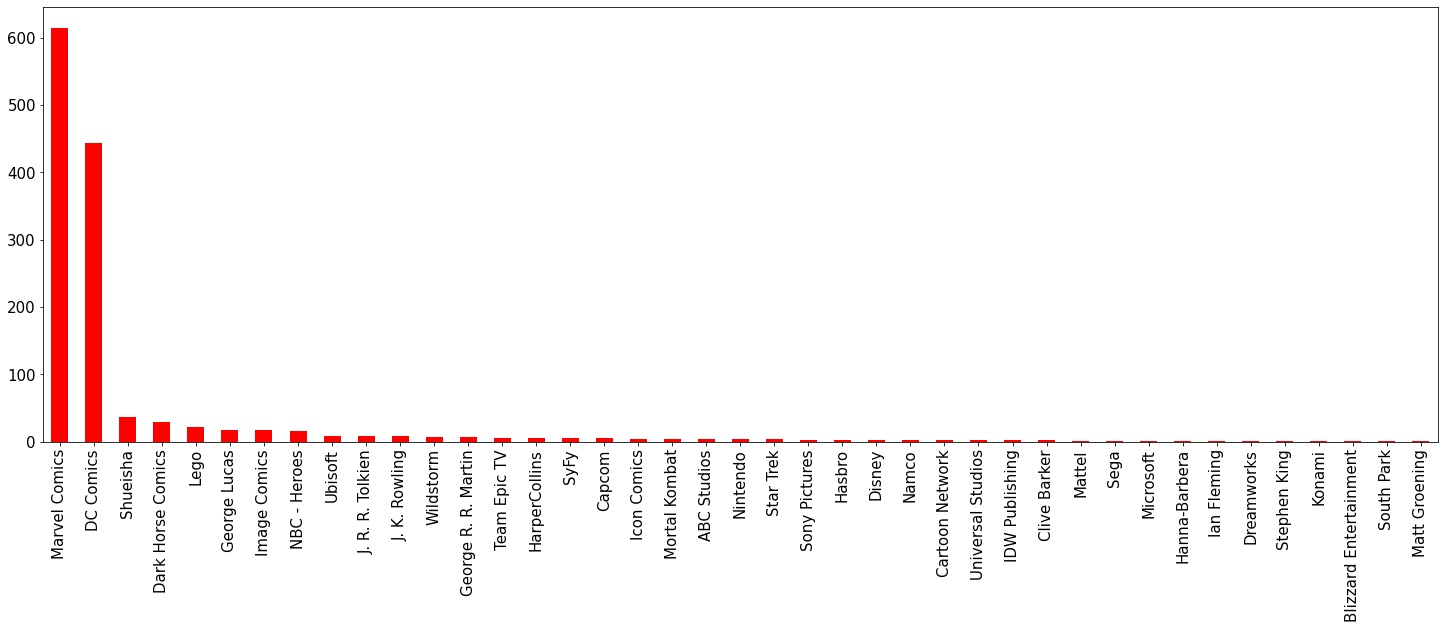

In [25]:
# Aqui irei trazer uma representação Gráfica dos dados anteriores para melhor vizualização.
dados.creator.value_counts().plot(kind='bar', figsize = (25,8), color='red', fontsize= 15)


In [26]:
# Para a próxima análise, irei criar uma dataframe somente com as informações de creator e history_text
analise_text = dados[['creator', 'history_text']]
analise_text.sample(5)

,creator,history_text
704,Marvel Comics,"Cain Marko is the son of Dr. Kurt Marko, who ..."
411,NaN,"In the time of King Novik, as the Argenta sec..."
1241,Marvel Comics,"When Ororo was growing up, she became a member..."
1334,DC Comics,NaN
587,Marvel Comics,Heimdall was the all-seeing and all-hearing As...


In [27]:
# Para não atrapalhar a análise, precisamos garantir que não haja valor nulo em nenhuma das colunas.
analise_text.isnull().sum()


creator         139
history_text     90
dtype: int64

Temos 139 linhas de creator nulos e 90 history_text nulos.

In [28]:
analise_text = analise_text.dropna()
analise_text.creator.value_counts().head(10)

Marvel Comics        583
DC Comics            414
Shueisha              35
Dark Horse Comics     26
Lego                  22
George Lucas          18
Image Comics          16
NBC - Heroes          15
Ubisoft                9
J. R. R. Tolkien       8
Name: creator, dtype: int64

O número de alguns cairam, mas a posição ainda é a mesma.

In [29]:
# Irei então verificar a frequência de palavras das duas maiores.
# Para isso, preciso criar uma dataframe filtrando o creator Marvel, e uma filtrando o creator DC.
# A imagem gerada irá mostrar a frequência das palavras nos campos de histórias das editoras.
# Quanto maior aparecer a imagem, maior é o numero de vezes em que ela apareceu.

df_marvel = analise_text.loc[(analise_text['creator'] == 'Marvel Comics' )]

df_dc = analise_text.loc[(analise_text['creator'] == 'DC Comics' )]


In [30]:
features_marvel = []
target_marvel = []

In [31]:
for i in df_marvel['history_text']:
    features_marvel.append(i)
    
for i in df_marvel['creator']:
    target_marvel.append(i)

In [32]:
word_marvel = df_marvel['history_text'].loc[(df_marvel.creator == 'Marvel Comics')]
word_marvel = word_marvel.sum()

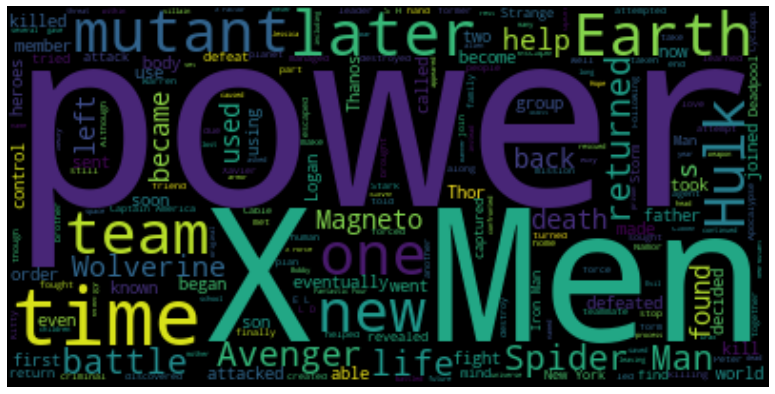

In [33]:
from wordcloud import WordCloud
%matplotlib inline 
wordcloud = WordCloud(max_font_size=300,background_color="black").generate(word_marvel)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


Aqui, podemos verificar que nos textos de história da editora Marvel, a palavra mais repetida é POWER, a letra X e a palavra MEN, claramente se referindo aos X-mens. Mutantes por consequência aparece bem grande também. Assim como o nome de dois mutantes bem populares dos X-mens tem visibilidade no centro, eles são Magneto e Wolverine.

In [34]:
features_dc = []
target_dc = []

In [35]:
for i in df_dc['history_text']:
    features_dc.append(i)
    
for i in df_dc['creator']:
    target_dc.append(i)

In [36]:
word_dc = df_dc['history_text'].loc[(df_dc.creator == 'DC Comics')]
word_dc = word_dc.sum()

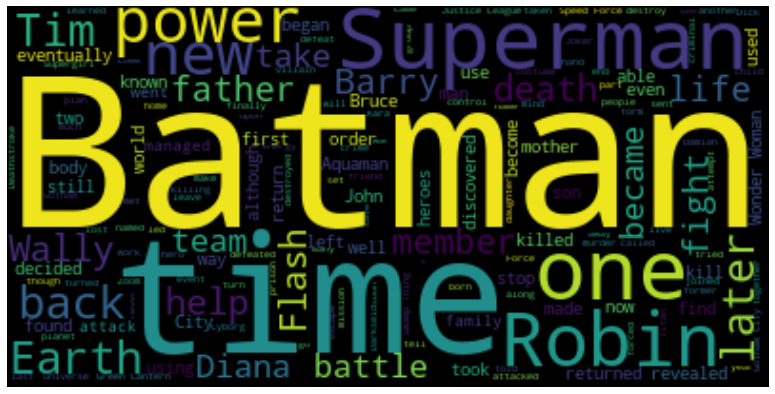

In [37]:
%matplotlib inline 
wordcloud = WordCloud(max_font_size=300,background_color="black").generate(word_dc)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Já na editora DC, temos a palavra BATMAN, seguido de TIME, com destaques claros para Robin e Superman. 
Alguns outros super heróis podem ser notados, como Diana/Wonder Woman, Aquaman e Flash e a palavra Earth,  provavelmente referindo-se a várias terras no multiverso ou sobre o planeta em conflitos galácticos.